# 04 - Fundamental concepts for image transformation and Fourier Transform

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v3 as imageio

## Part A - Representations of functions

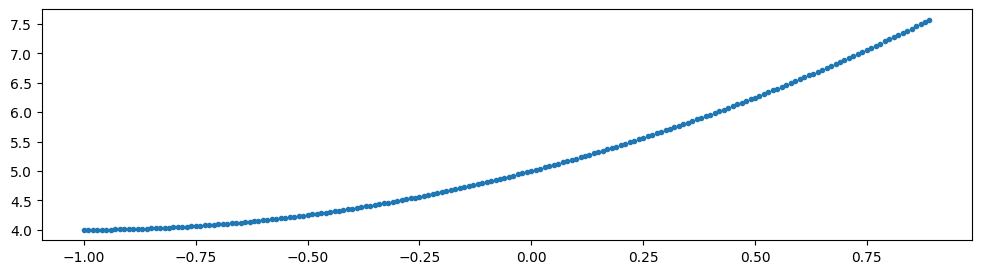

In [7]:
x = np.arange(-1, 0.9, 0.01) # Points in x which the function will be evaluated
f = 5 + 2*x + 1*x**2
plt.figure(figsize=(12, 3))
plt.plot(x, f, '.')

In [9]:
# Sample points from f
sx = np.zeros(round(len(x)/20.0))
sf = np.zeros(round(len(x)/20.0))
print(sx)
print(sf)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [12]:
j = 0
for i in range(0, len(x) + 1, 21):
    sx[j] = x[i] # sample from x
    sf[j] = f[i] # sample from f
    j = j + 1
    
print(sx)
print(sf)

[-1.   -0.79 -0.58 -0.37 -0.16  0.05  0.26  0.47  0.68  0.89]
[4.     4.0441 4.1764 4.3969 4.7056 5.1025 5.5876 6.1609 6.8224 7.5721]


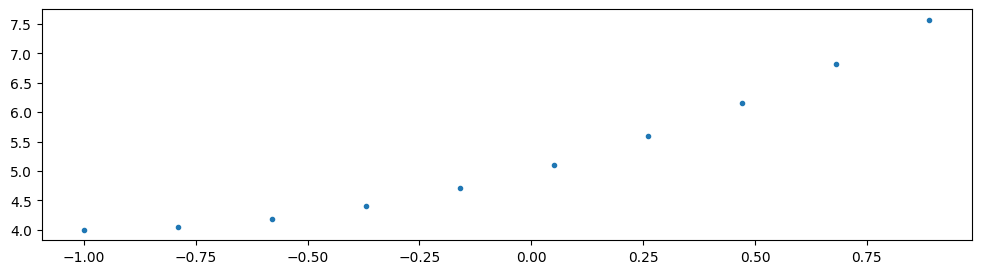

In [11]:
plt.figure(figsize=(12, 3))
plt.plot(sx, sf, '.')

In [13]:
# Building the linear system
N = 2 # degree of polynomial
Y = sf

A = np.zeros([len(Y), N+1])
A[:, 0] = sx**N # column 1 - coefficient N (2)
A[:, 1] = sx**(N-1) # column 2 - coefficient N-1 (1)
A[:, 2] = 1 # column 3 - coefficient N-2 (0)

print(A)
print(Y)


[[ 1.     -1.      1.    ]
 [ 0.6241 -0.79    1.    ]
 [ 0.3364 -0.58    1.    ]
 [ 0.1369 -0.37    1.    ]
 [ 0.0256 -0.16    1.    ]
 [ 0.0025  0.05    1.    ]
 [ 0.0676  0.26    1.    ]
 [ 0.2209  0.47    1.    ]
 [ 0.4624  0.68    1.    ]
 [ 0.7921  0.89    1.    ]]
[4.     4.0441 4.1764 4.3969 4.7056 5.1025 5.5876 6.1609 6.8224 7.5721]


In [14]:
# Compute the coefficients by solving the linear system
from numpy.linalg import inv

C1 = inv(np.matmul(np.transpose(A), A))
C2 = np.matmul(np.transpose(A), Y)
C = np.matmul(C1, C2)

print(C)

[1. 2. 5.]


## Part B - Sinusoids and Complex Exponentials

Remember we want functions with the property:

$f(x) = f(x + kT)$, in which $T$ is the period and $k = 0, 1, ...$

In [15]:
t = 2
print("%.4f"% (np.sin(t)))
print("%.4f"% (np.cos(t)))


0.9093
-0.4161


In [17]:
T = 2*np.pi
print("%.4f"% (np.sin(t + T)))
print("%.4f"% (np.cos(t + T)))

0.9093
-0.4161


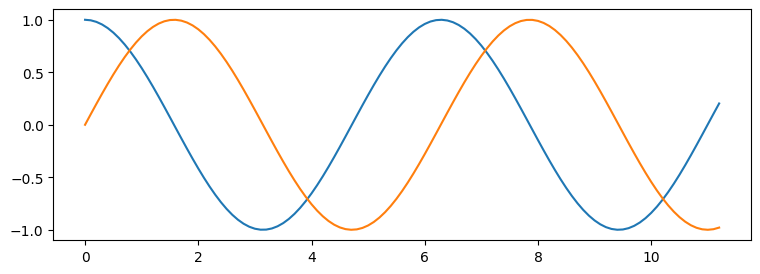

In [20]:
t = np.arange(0, T+5, 0.1)

fcos = np.cos(t)
fsin = np.sin(t)

plt.figure(figsize=(9, 3))
plt.plot(t, fcos)
plt.plot(t, fsin)

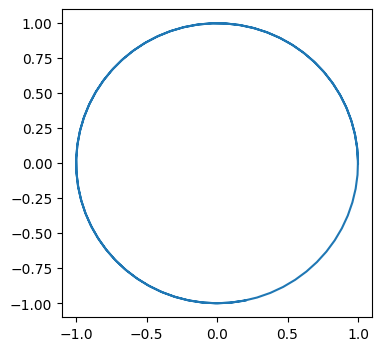

In [22]:
# Produce the circle
plt.figure(figsize=(4, 4))
plt.plot(fcos, fsin)

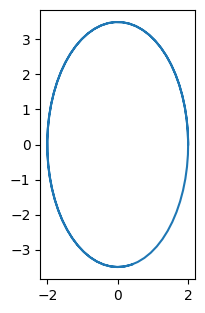

In [27]:
fcos = 2*np.cos(t)
fsin = 3.5*np.sin(t)

plt.figure(figsize=(2, 3.5))
plt.plot(fcos, fsin)

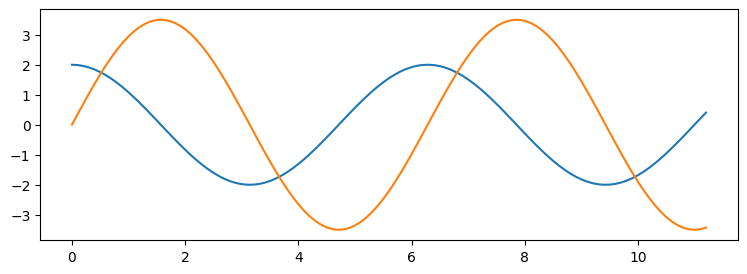

In [26]:
plt.figure(figsize=(9, 3))
plt.plot(t, fcos)
plt.plot(t, fsin)

In [31]:
# Complex number representation
comp_numb = (3 + 2j)
print(comp_numb)

(3+2j)


In [29]:
print(comp_numb.real)

3.0


In [30]:
print(comp_numb.imag)

2.0


In [33]:
# Complex exponential
exponen_3_5 = np.exp(0 + 3.5j)
print(exponen_3_5)

(-0.9364566872907963-0.35078322768961984j)


In [36]:
print("Real part: %.4f, Imaginary part: %.4f"% (exponen_3_5.real, exponen_3_5.imag))

Real part: -0.9365, Imaginary part: -0.3508


In [40]:
print("Cosine: %.4f, Sine: %.4f"% (np.cos(3.5), np.sin(3.5)))

Cosine: -0.9365, Sine: -0.3508
